<a href="https://colab.research.google.com/github/nayanakrishnan2050/ml_colab/blob/main/Copy_of_life_expetancy_linear_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
from google.colab import files
#files.upload()

In [ ]:
life_dataset=pd.read_csv('/content/Life Expectancy Data.csv')
life_dataset

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [ ]:
life_dataset.shape

(2938, 22)

In [ ]:

life_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
#checking the missing value
life_dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
life_dataset1=life_dataset.dropna()

In [ ]:
life_dataset1.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [ ]:
life_dataset1.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
life_dataset1.shape

(1649, 22)

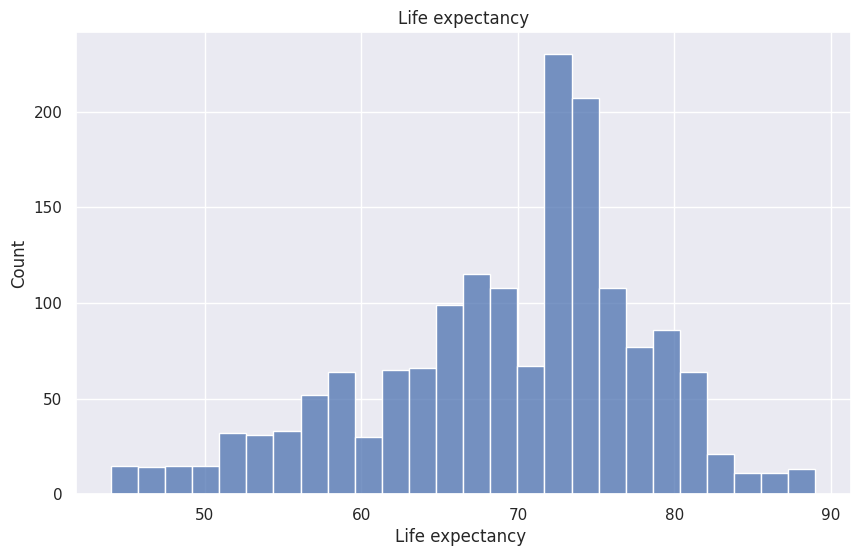

In [ ]:
# life expectancy
sns.set()
plt.figure(figsize=(10,6))
sns.histplot(life_dataset1['Life expectancy '])
plt.title('Life expectancy')
plt.show()

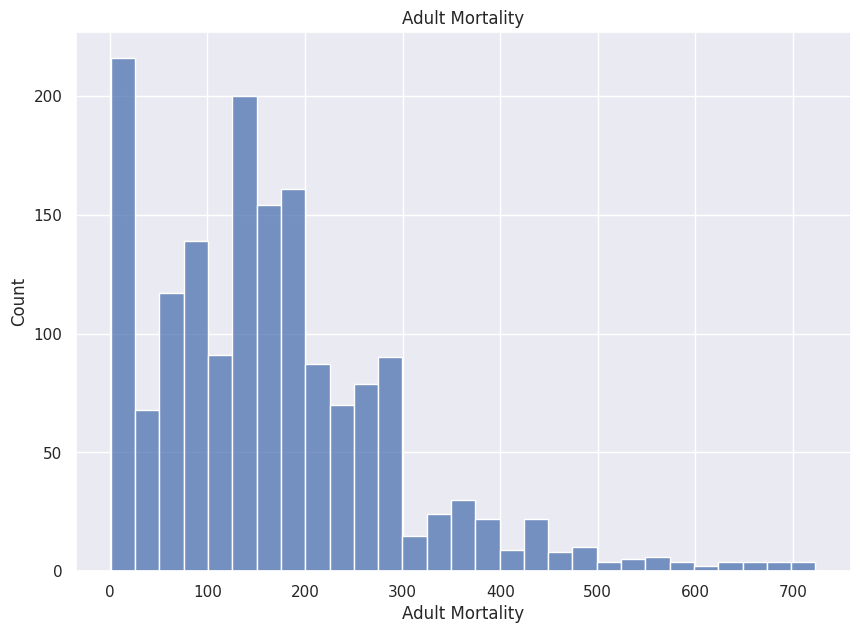

In [ ]:
#adult mortality

plt.figure(figsize=(10,7))
sns.histplot(life_dataset1['Adult Mortality'])
plt.title('Adult Mortality')
plt.show()

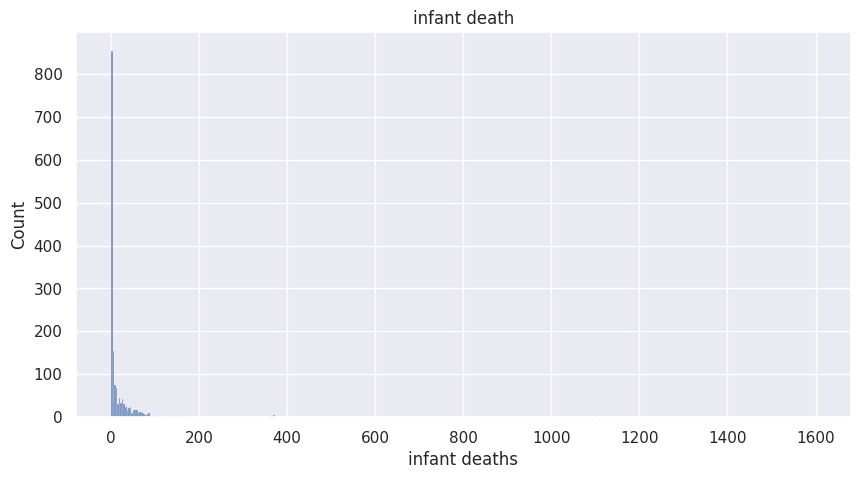

In [ ]:
#infant death

plt.figure(figsize=(10,5))
sns.histplot(life_dataset1['infant deaths'])
plt.title('infant death')
plt.show()

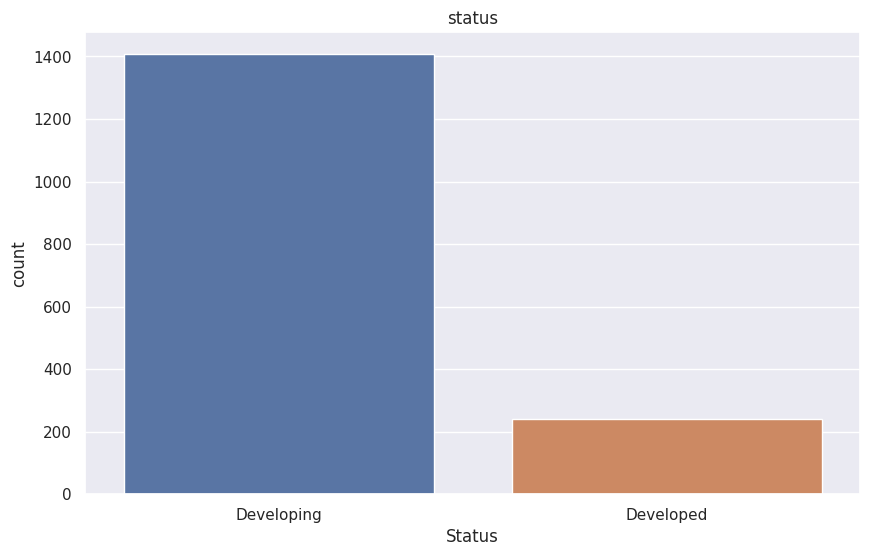

In [ ]:
#count plot of status
plt.figure(figsize=(10,6))
sns.countplot(x='Status',data=life_dataset1)
plt.title('status')
plt.show()

In [ ]:
life_dataset1['Country'].value_counts()

Afghanistan          16
Albania              16
Kiribati             15
Mexico               15
Mauritius            15
                     ..
Ireland               5
Sweden                4
Netherlands           4
Haiti                 2
Equatorial Guinea     1
Name: Country, Length: 133, dtype: int64

In [ ]:
life_dataset1['Status'].value_counts()

Developing    1407
Developed      242
Name: Status, dtype: int64

In [ ]:
#encording the set column
life_dataset1.replace({'Status':{'Developing':0,'Developed':1}},inplace=True)

<ipython-input-53-ff2cb3c27a25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life_dataset1.replace({'Status':{'Developing':0,'Developed':1}},inplace=True)


In [ ]:
life_dataset1.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


SPLITTING

In [ ]:
x=life_dataset1.drop(columns=['Life expectancy ','Year','Country'],axis=1)
y=life_dataset1['Life expectancy ']

In [ ]:
print(x)

      Status  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0          0            263.0             62     0.01               71.279624   
1          0            271.0             64     0.01               73.523582   
2          0            268.0             66     0.01               73.219243   
3          0            272.0             69     0.01               78.184215   
4          0            275.0             71     0.01                7.097109   
...      ...              ...            ...      ...                     ...   
2933       0            723.0             27     4.36                0.000000   
2934       0            715.0             26     4.06                0.000000   
2935       0             73.0             25     4.43                0.000000   
2936       0            686.0             25     1.72                0.000000   
2937       0            665.0             24     1.68                0.000000   

      Hepatitis B  Measles 

In [ ]:
print(y)

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2933    44.3
2934    44.5
2935    44.8
2936    45.3
2937    46.0
Name: Life expectancy , Length: 1649, dtype: float64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1649, 19) (1319, 19) (330, 19)


In [ ]:
print(x_train)

      Status  Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
529        0            362.0             46     0.01               11.302067   
1627       0            288.0             57     0.53               67.709207   
2275       0            135.0              1     9.60              503.111595   
450        0             12.0              0     0.01              325.629863   
481        0            366.0             47     0.01               61.392636   
...      ...              ...            ...      ...                     ...   
2720       0            378.0             82     9.63               87.045350   
2839       0            186.0             27     1.47               24.994387   
868        0            127.0              0     0.01              261.291481   
932        0             81.0              3    11.10             6646.953935   
2029       0            219.0             59     4.42              159.534849   

      Hepatitis B  Measles 

In [ ]:
print(y_train)

529     52.6
1627    54.3
2275    73.0
450     72.8
481     56.7
        ... 
2720    57.5
2839    67.1
868     76.9
932     82.0
2029    68.0
Name: Life expectancy , Length: 1319, dtype: float64


model training

In [ ]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)#training the algorithm

LinearRegression()

model evaluation

In [ ]:
#prediction on training data
training_data_prediction=regressor.predict(x_train)


In [ ]:
#R squared value
r2_train=metrics.r2_score(y_train, training_data_prediction)
print('R squared value:',r2_train)

R squared value: 0.8303851282015962


In [ ]:
#prediction on testing data
test_data_prediction=regressor.predict(x_test)

In [ ]:
#R squared value
r2_test=metrics.r2_score(y_test,test_data_prediction)
print('R squared value:', r2_test)

R squared value: 0.850898063125558


In [ ]:
x_test.to_csv('life expectancy.csv',index=False)
from google.colab import files
files.download('life expectancy.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
input_data=(0,133.0,1,3.83,427.3054534,92.0,0,53.5,1,93.0,5.36,92.0,0.5,4855.743789,286287.0,1.8,1.7,0.727,12.8)
#changing the input data into numpy array
input_data_as_numpy_array=np.array(input_data)
#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction[0])
print('life expectancy',prediction[0])



72.7162866297144
life expectancy 72.7162866297144


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
